# Data Exploration Continued

**Author:** Elise Chessman

As I have written before, I want to compare the potential for displacement in more urban settings and more rural areas that had been former mining communities. I'm interested in assessing if displacement occurs more dramatically in communities with a lack of economic diversity. For this week, I started to explore some of the mine data out there, and also did another dive into some ACS data to examine a different indicator for displacement.

In [1]:
# First I'll inport the libraries that I need to read, display, and map all of my data for this notebook properly: 
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

## Mines

Here's data from the USGS on "Mine plants and operations for commodities monitored by the National Minerals Information Center of the USGS. Operations included are those considered active in 2003 and surveyed by the USGS." Here's the link to where I got it: https://mrdata.usgs.gov/mineplant/

I'll explore this data a bit here: 

In [2]:
zipfile = "mineplant-fUS08.zip"
mining = gpd.read_file(zipfile)

In [3]:
mining.shape

(153, 10)

In [4]:
type(mining)

geopandas.geodataframe.GeoDataFrame

In [5]:
mining.info

<bound method DataFrame.info of      rec_no              commodity                        site_name  \
0       117              Bentonite  Triangle Vol-Quad Volcano Group   
1       204                 Cement                      Lyons Plant   
2       205                 Cement                   Florence Plant   
3       341  Common Clay and Shale                    Hogback 3 & 4   
4       342  Common Clay and Shale                          Pioneer   
..      ...                    ...                              ...   
148    4197        Sand and Gravel           Idaho Creek Gravel #11   
149    6577                 Silver                     Cresson Mine   
150    6611               Soda Ash                  Parachute Plant   
151    6612               Soda Ash                Piceance Facility   
152    6642                 Sulfur                  Denver Refinery   

                                company_na state_loca      county  latitude  \
0                          First Ben

<AxesSubplot:>

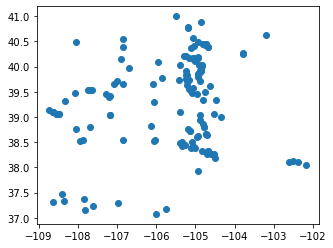

In [6]:
mining.plot()

In [7]:
mining.head()

,rec_no,commodity,site_name,company_na,state_loca,county,latitude,longitude,plant_min,geometry
0,117,Bentonite,Triangle Vol-Quad Volcano Group,First Bentonite,Colorado,Fremont,38.418,-105.344,M,POINT (-105.34400 38.41800)
1,204,Cement,Lyons Plant,Cemex USA,Colorado,Boulder,40.218,-105.262,P,POINT (-105.26200 40.21800)
2,205,Cement,Florence Plant,Holcim (US) Inc,Colorado,Fremont,38.383,-104.999,P,POINT (-104.99900 38.38300)
3,341,Common Clay and Shale,Hogback 3 & 4,Robinson Brick & Tile Co,Colorado,Douglas,39.481,-105.081,M/P,POINT (-105.08100 39.48100)
4,342,Common Clay and Shale,Pioneer,Robinson Brick & Tile Co,Colorado,Douglas,39.486,-104.756,M/P,POINT (-104.75600 39.48600)


Ok great! An awesome next step for me would be to figure out how to overlay these mine sites as a point layer on my map below of rent burdened counties to see if rent burden correlates with mining as an industry. I could then do a spatial join somehow and potentially summarize each of those counties to see how many mines were located within them. I'm struggling to figure out how to map these mining sites on the same map as my census exploration below right now, so I'll table this for now. I also think this tells me the story of what is going on right now with the mining industry rather than helping me see if historically mining turned tourism-dominated towns are particularly rent burdened and displacement prone. A similar spatial join with my historic mine data (below) would certainly be more illuminating, but I'm struggling to clean up and work with that data. More on that below.

## Historic Mines 

This is a really cool dataset that I found from the USGS. It shows "symbols indicating mining-related features digitized from historical USGS topographic maps in the western part of the conterminous US. Includes prospect pits, mine shafts and adits, quarries, open-pit mines, tailings piles and ponds, gravel and borrow pits, and other features." 

Historic mining info downloaded from here: https://mrdata.usgs.gov/usmin/

I ran through this all before, but didn't rerun my cells because I was running out of memory on Jupyterhub. I'll talk a bit about the issues that I ran into below:

In [ ]:
zipfile2 = "usmin-CO (1).zip"
mining_hist = gpd.read_file(zipfile2)

In [ ]:
mining_hist.info

In [ ]:
mining_hist.plot()

In [ ]:
mining_hist.head()

In [ ]:
list(mining_hist)

In [ ]:
mining_hist.sample(10)

In [ ]:
mining_hist['FTR_TYPE'].value_counts()

In [ ]:
mining_hist['TOPO_DATE'].value_counts()

This is a massive data set, and it compiles any mining related activity that appeared on USGS topographic maps from 1955 up through the 1980s. 

My hope was to clean up the data and make it a bit easier to use by selecting out some of the specific attributed that I wanted to use within the rows.

I was attempting to stick to some of the actual mines, and remove the associated features or pits that might make this an overwhelming dataset to work with. 

However, I was struggling to use the **.loc/.iloc** or **query** functions to filter out multiple attributes at once from my data. I attempted the code below along with a few other tries, but after getting very lost reading about operator chaining, I decided to move on with this week's assignment to be able to accomplish some new census data exploration that I needed to get done rather than continuing to fumble with this.

In [ ]:
mines_trimmed = mining_hist.copy()
mines_trimmed

In [ ]:
mines_trimmed.loc[mines_trimmed['FTR_TYPE'] == ['Mine Shaft',
              'Open Pit Mine',
              'Quarry',
              'Open Pit Mine or Quarry',
              'Mine',
              'Strip Mine',
              'Placer Mine',
              'Coal Mine',
              'Quarry - Rock',
              'Uranium Mine']

I would love to figure out how to use this data set and keep these specific features, but reading the stack overflow documentation is causing way more confusion than help. I'm going to pause on this.

## Part 2 - More Indicators for Displacement 

After examing race for last week's assignment, I realized that it may not be the best indicator of change and shifting demographics for Colorado, nor would it be great indicator of displacement. I'm going to instead use the ACS 2019 data to explore which counties in the state of Colorado are most burdened by rent. 

I'll start by exploring my data a bit as we have already done before:

In [8]:
gdf = gpd.read_file('acs2019_5yr_B25070_05000US08045.geojson')

In [9]:
gdf.shape

(65, 25)

In [10]:
gdf.head()

,geoid,name,B25070001,"B25070001, Error",B25070002,"B25070002, Error",B25070003,"B25070003, Error",B25070004,"B25070004, Error",...,"B25070007, Error",B25070008,"B25070008, Error",B25070009,"B25070009, Error",B25070010,"B25070010, Error",B25070011,"B25070011, Error",geometry
0,04000US08,Colorado,747259.0,5909.0,22676.0,1024.0,51994.0,1888.0,90813.0,2384.0,...,2231.0,50078.0,1820.0,70201.0,1841.0,172202.0,2909.0,36645.0,1365.0,"MULTIPOLYGON (((-109.05095 40.22265, -109.0509..."
1,05000US08001,"Adams County, CO",56242.0,1296.0,1211.0,278.0,3017.0,416.0,5779.0,511.0,...,551.0,4648.0,503.0,6100.0,536.0,12992.0,791.0,2187.0,385.0,"MULTIPOLYGON (((-104.60700 39.89941, -104.6071..."
2,05000US08003,"Alamosa County, CO",2600.0,307.0,117.0,78.0,132.0,62.0,457.0,202.0,...,106.0,184.0,107.0,232.0,102.0,529.0,166.0,182.0,68.0,"MULTIPOLYGON (((-106.03930 37.57699, -106.0393..."
3,05000US08005,"Arapahoe County, CO",87669.0,1537.0,2146.0,341.0,4980.0,530.0,10503.0,714.0,...,702.0,6365.0,543.0,9356.0,721.0,19876.0,1147.0,3093.0,401.0,"MULTIPOLYGON (((-104.79137 39.56609, -104.7928..."
4,05000US08007,"Archuleta County, CO",1628.0,264.0,65.0,66.0,184.0,106.0,139.0,73.0,...,97.0,115.0,91.0,207.0,109.0,245.0,99.0,70.0,49.0,"MULTIPOLYGON (((-107.25497 37.00002, -107.2553..."


<AxesSubplot:>

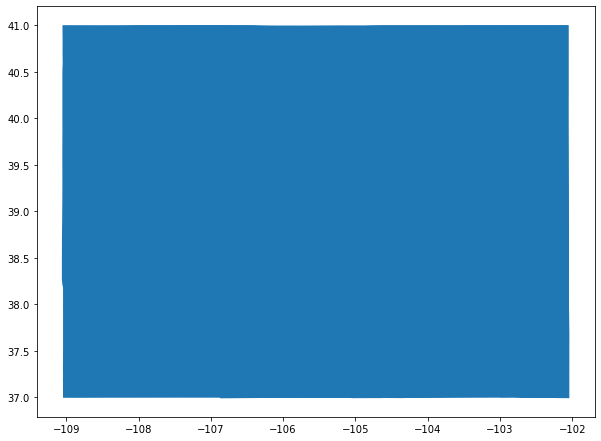

In [11]:
gdf.plot(figsize=(10,10))

In [12]:
 gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             65 non-null     object  
 1   name              65 non-null     object  
 2   B25070001         65 non-null     float64 
 3   B25070001, Error  65 non-null     float64 
 4   B25070002         65 non-null     float64 
 5   B25070002, Error  65 non-null     float64 
 6   B25070003         65 non-null     float64 
 7   B25070003, Error  65 non-null     float64 
 8   B25070004         65 non-null     float64 
 9   B25070004, Error  65 non-null     float64 
 10  B25070005         65 non-null     float64 
 11  B25070005, Error  65 non-null     float64 
 12  B25070006         65 non-null     float64 
 13  B25070006, Error  65 non-null     float64 
 14  B25070007         65 non-null     float64 
 15  B25070007, Error  65 non-null     float64 
 16  B25070008         65

In [13]:
list(gdf)

['geoid',
 'name',
 'B25070001',
 'B25070001, Error',
 'B25070002',
 'B25070002, Error',
 'B25070003',
 'B25070003, Error',
 'B25070004',
 'B25070004, Error',
 'B25070005',
 'B25070005, Error',
 'B25070006',
 'B25070006, Error',
 'B25070007',
 'B25070007, Error',
 'B25070008',
 'B25070008, Error',
 'B25070009',
 'B25070009, Error',
 'B25070010',
 'B25070010, Error',
 'B25070011',
 'B25070011, Error',
 'geometry']

I don't need to hang onto those error columns, so I'll clear those out and rename my columns again:

In [14]:
columns_to_keep = ['geoid',
 'name',
 'B25070001',
 'B25070002',
 'B25070003',
 'B25070004',
 'B25070005',
 'B25070006',
 'B25070007',
 'B25070008',
 'B25070009',
 'B25070010',
 'B25070011',
 'geometry']
gdf = gdf[columns_to_keep]

In [15]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Less than 10.0 percent',
 '10.0 to 14.9 percent',
 '15.0 to 19.9 percent',
 '20.0 to 24.9 percent',
 '25.0 to 29.9 percent',
 '30.0 to 34.9 percent',
 '35.0 to 39.9 percent',
 '40.0 to 49.9 percent',
 '50.0 percent or more',
 'Not computed,',
 'geometry']

Can't forget to drop my summary column and check to make sure that my columns look good:

In [18]:
gdf=gdf.drop([0])
gdf.head()

,geoid,name,Total,Less than 10.0 percent,10.0 to 14.9 percent,15.0 to 19.9 percent,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 to 39.9 percent,40.0 to 49.9 percent,50.0 percent or more,"Not computed,",geometry
1,05000US08001,"Adams County, CO",56242.0,1211.0,3017.0,5779.0,7481.0,6828.0,5999.0,4648.0,6100.0,12992.0,2187.0,"MULTIPOLYGON (((-104.60700 39.89941, -104.6071..."
2,05000US08003,"Alamosa County, CO",2600.0,117.0,132.0,457.0,260.0,291.0,216.0,184.0,232.0,529.0,182.0,"MULTIPOLYGON (((-106.03930 37.57699, -106.0393..."
3,05000US08005,"Arapahoe County, CO",87669.0,2146.0,4980.0,10503.0,11662.0,10640.0,9048.0,6365.0,9356.0,19876.0,3093.0,"MULTIPOLYGON (((-104.79137 39.56609, -104.7928..."
4,05000US08007,"Archuleta County, CO",1628.0,65.0,184.0,139.0,304.0,86.0,213.0,115.0,207.0,245.0,70.0,"MULTIPOLYGON (((-107.25497 37.00002, -107.2553..."
5,05000US08009,"Baca County, CO",482.0,43.0,50.0,48.0,35.0,70.0,13.0,12.0,31.0,53.0,127.0,"MULTIPOLYGON (((-102.84192 36.99960, -102.8419..."


I'll try a histogram for good measure again as well:

<AxesSubplot:ylabel='Frequency'>

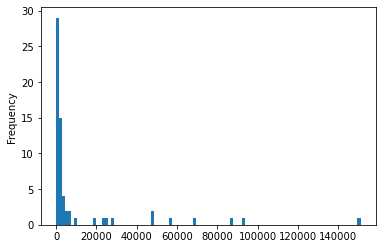

In [19]:
gdf['Total'].plot.hist(bins=100)

I assume that the massive blip on this distribution is just because Denver County is so much more populous than the rest of the state, but I'll sort my data by the total population by county to confirm:

In [20]:
gdf_sortpopulation = gdf.sort_values(by='Total',ascending = False)
gdf_sortpopulation.head(5)

,geoid,name,Total,Less than 10.0 percent,10.0 to 14.9 percent,15.0 to 19.9 percent,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 to 39.9 percent,40.0 to 49.9 percent,50.0 percent or more,"Not computed,",geometry
17,05000US08031,"Denver County, CO",151119.0,4464.0,12662.0,20532.0,20861.0,18346.0,12909.0,9451.0,12912.0,33031.0,5951.0,"MULTIPOLYGON (((-105.10992 39.62723, -105.1099..."
22,05000US08041,"El Paso County, CO",92830.0,2525.0,6382.0,11317.0,12503.0,10368.0,9329.0,7095.0,8770.0,21138.0,3403.0,"MULTIPOLYGON (((-104.93899 38.79201, -104.9389..."
3,05000US08005,"Arapahoe County, CO",87669.0,2146.0,4980.0,10503.0,11662.0,10640.0,9048.0,6365.0,9356.0,19876.0,3093.0,"MULTIPOLYGON (((-104.79137 39.56609, -104.7928..."
31,05000US08059,"Jefferson County, CO",68098.0,1461.0,4546.0,8603.0,9406.0,7868.0,6116.0,4561.0,6695.0,16272.0,2570.0,"MULTIPOLYGON (((-105.39835 39.71715, -105.3983..."
1,05000US08001,"Adams County, CO",56242.0,1211.0,3017.0,5779.0,7481.0,6828.0,5999.0,4648.0,6100.0,12992.0,2187.0,"MULTIPOLYGON (((-104.60700 39.89941, -104.6071..."


I now am going to normalize the data again, to see what percent of the population is in each of these brackets of rent/income percentages and map them properly:

In [21]:
gdf['Percent Pop. with Rent Less than 10 percent of Income'] = gdf['Less than 10.0 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 10-14.9 percent of Income'] = gdf['10.0 to 14.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 15-19.9 percent of Income'] = gdf['15.0 to 19.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 20-24.9 percent of Income'] = gdf['20.0 to 24.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 25-29.9 percent of Income'] = gdf['25.0 to 29.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 30-34.9 percent of Income'] = gdf['30.0 to 34.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 35-39.9 percent of Income'] = gdf['35.0 to 39.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 40-49.9 percent of Income'] = gdf['40.0 to 49.9 percent']/gdf['Total']*100
gdf['Percent Pop. with Rent 50 percent or more of Income'] = gdf['50.0 percent or more']/gdf['Total']*100
gdf['Percentage not computed'] = gdf['Not computed,']/gdf['Total']*100

In [22]:
gdf.head()

,geoid,name,Total,Less than 10.0 percent,10.0 to 14.9 percent,15.0 to 19.9 percent,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 to 39.9 percent,...,Percent Pop. with Rent Less than 10 percent of Income,Percent Pop. with Rent 10-14.9 percent of Income,Percent Pop. with Rent 15-19.9 percent of Income,Percent Pop. with Rent 20-24.9 percent of Income,Percent Pop. with Rent 25-29.9 percent of Income,Percent Pop. with Rent 30-34.9 percent of Income,Percent Pop. with Rent 35-39.9 percent of Income,Percent Pop. with Rent 40-49.9 percent of Income,Percent Pop. with Rent 50 percent or more of Income,Percentage not computed
1,05000US08001,"Adams County, CO",56242.0,1211.0,3017.0,5779.0,7481.0,6828.0,5999.0,4648.0,...,2.153195,5.364318,10.275239,13.301447,12.140393,10.666406,8.264286,10.845987,23.100174,3.888553
2,05000US08003,"Alamosa County, CO",2600.0,117.0,132.0,457.0,260.0,291.0,216.0,184.0,...,4.500000,5.076923,17.576923,10.000000,11.192308,8.307692,7.076923,8.923077,20.346154,7.000000
3,05000US08005,"Arapahoe County, CO",87669.0,2146.0,4980.0,10503.0,11662.0,10640.0,9048.0,6365.0,...,2.447844,5.680457,11.980289,13.302308,12.136559,10.320638,7.260263,10.671959,22.671640,3.528043
4,05000US08007,"Archuleta County, CO",1628.0,65.0,184.0,139.0,304.0,86.0,213.0,115.0,...,3.992629,11.302211,8.538084,18.673219,5.282555,13.083538,7.063882,12.714988,15.049140,4.299754
5,05000US08009,"Baca County, CO",482.0,43.0,50.0,48.0,35.0,70.0,13.0,12.0,...,8.921162,10.373444,9.958506,7.261411,14.522822,2.697095,2.489627,6.431535,10.995851,26.348548


And now to map the percent of the population with rent encompassing over 50% of their income to get a sense of this data:

<AxesSubplot:>

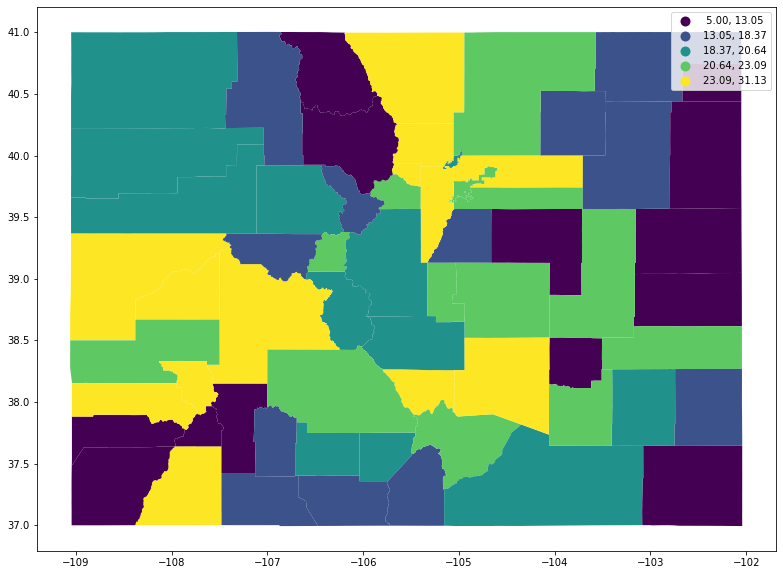

In [23]:
gdf.plot(figsize=(15,10),
                 column='Percent Pop. with Rent 50 percent or more of Income',
                 legend=True, 
                 scheme='quantiles')

According to the California Budget and Policy center, "households paying more than 30 percent of income toward housing are considered housing “cost-burdened,” and those with housing costs that exceed half of income are considered “severely” cost-burdened." (https://calbudgetcenter.org/resources/throughout-the-state-californians-pay-more-than-they-can-afford-for-housing/). 

I'll go off this definition for looking at rent burdened households across the state.

Using this cutoff, I am going to create two new columns and break up my data into two groups: one where their rent is 30% or greater of their income, and one where their rent is less than 30% of their income:

In [24]:
gdf['Percent Pop. with Rent 30 percent or more of Income'] = gdf['Percent Pop. with Rent 30-34.9 percent of Income']+gdf['Percent Pop. with Rent 35-39.9 percent of Income']+gdf['Percent Pop. with Rent 40-49.9 percent of Income']+gdf['Percent Pop. with Rent 50 percent or more of Income']
gdf['Percent Pop. with Rent Less than 30 percent of income'] = gdf['Percent Pop. with Rent Less than 10 percent of Income']+gdf['Percent Pop. with Rent 10-14.9 percent of Income']+gdf['Percent Pop. with Rent 15-19.9 percent of Income']+gdf['Percent Pop. with Rent 20-24.9 percent of Income']+gdf['Percent Pop. with Rent 25-29.9 percent of Income']
gdf.head()

,geoid,name,Total,Less than 10.0 percent,10.0 to 14.9 percent,15.0 to 19.9 percent,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 to 39.9 percent,...,Percent Pop. with Rent 15-19.9 percent of Income,Percent Pop. with Rent 20-24.9 percent of Income,Percent Pop. with Rent 25-29.9 percent of Income,Percent Pop. with Rent 30-34.9 percent of Income,Percent Pop. with Rent 35-39.9 percent of Income,Percent Pop. with Rent 40-49.9 percent of Income,Percent Pop. with Rent 50 percent or more of Income,Percentage not computed,Percent Pop. with Rent 30 percent or more of Income,Percent Pop. with Rent Less than 30 percent of income
1,05000US08001,"Adams County, CO",56242.0,1211.0,3017.0,5779.0,7481.0,6828.0,5999.0,4648.0,...,10.275239,13.301447,12.140393,10.666406,8.264286,10.845987,23.100174,3.888553,52.876854,43.234593
2,05000US08003,"Alamosa County, CO",2600.0,117.0,132.0,457.0,260.0,291.0,216.0,184.0,...,17.576923,10.000000,11.192308,8.307692,7.076923,8.923077,20.346154,7.000000,44.653846,48.346154
3,05000US08005,"Arapahoe County, CO",87669.0,2146.0,4980.0,10503.0,11662.0,10640.0,9048.0,6365.0,...,11.980289,13.302308,12.136559,10.320638,7.260263,10.671959,22.671640,3.528043,50.924500,45.547457
4,05000US08007,"Archuleta County, CO",1628.0,65.0,184.0,139.0,304.0,86.0,213.0,115.0,...,8.538084,18.673219,5.282555,13.083538,7.063882,12.714988,15.049140,4.299754,47.911548,47.788698
5,05000US08009,"Baca County, CO",482.0,43.0,50.0,48.0,35.0,70.0,13.0,12.0,...,9.958506,7.261411,14.522822,2.697095,2.489627,6.431535,10.995851,26.348548,22.614108,51.037344


Now I'll create two maps based off of these groupings:

Text(0.5, 1.0, 'Percent Pop. with Rent Less than 30 percent of income')

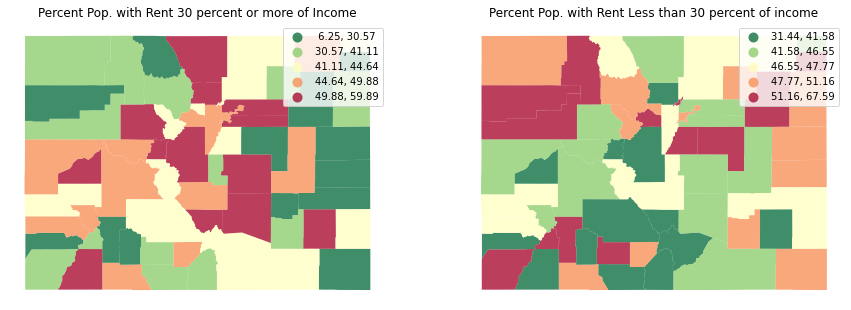

In [25]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent rent burdened map on the left
gdf.plot(column='Percent Pop. with Rent 30 percent or more of Income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Pop. with Rent 30 percent or more of Income")

# percent black map on the right
gdf.plot(column='Percent Pop. with Rent Less than 30 percent of income', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Pop. with Rent Less than 30 percent of income")

Finally, I'll make a web map that shows where throughout the state is most rent burdened. Hopefully my next step will be to add the historic mine site data to this map and explore if there is a relationship through a spatial join. But for now, I'll start by looking at counties where those with rent accounting for over 30% of their income makes up the majority of the population (over 50%). That's kind of a mouthful, but hopefully that makes sense!

In [26]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

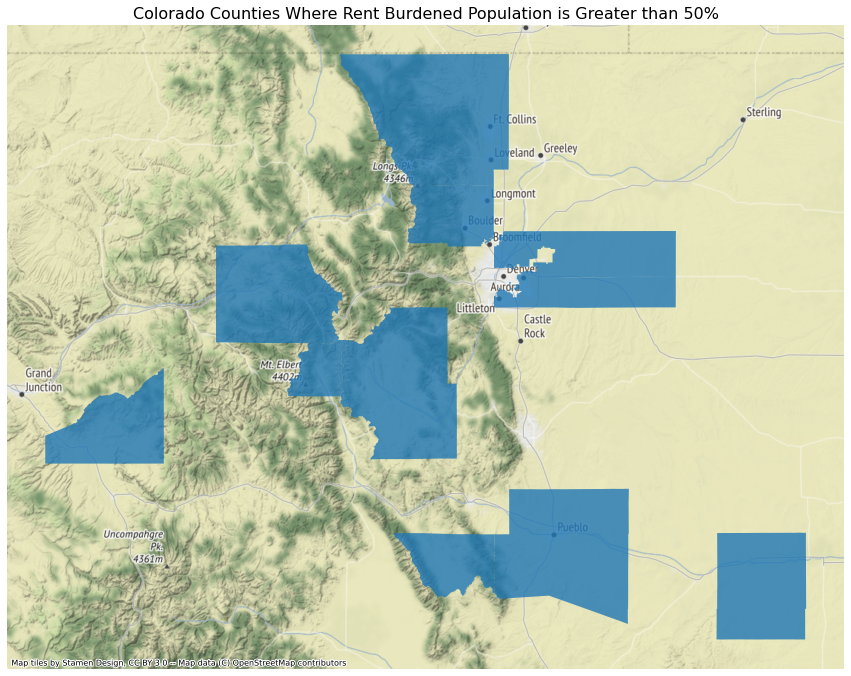

In [28]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Pop. with Rent 30 percent or more of Income'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title("Colorado Counties Where Rent Burdened Population is Greater than 50%",fontsize=16)

# add a basemap
ctx.add_basemap(ax)